## 项目背景
索尼公司是源自日本的跨国综合企业，以研制电子产品为主要事业，经营领域横跨消费电子产品、专业性电子产品、电子游戏、金融、娱乐等，拥有全世界的品牌知名度。目前在国内，索尼的产品主要覆盖在照相机，摄像机，电视，和智能手机四个主要领域。
My Sony俱乐部是索尼官方专为索尼会员设立的会员中心，分注册会员、铜牌会员、银牌会员、金牌会员四个等级，会员可根据会员等级享受不同的会员权益。同时，索尼还为尊敬的索尼会员提供了丰富的线上线下活动以及影像课堂等福利。
My Sony会员，共分为注册会员、铜牌会员、银牌会员、金牌会员4个等级。会员的等级由"成长值"数值决定，成长值越高，会员等级越高。加入索尼会员可以享受会员尊享价，官方延保以及累积成长等多个激励。用户可以通过索尼中国在线商城，索尼产品，索尼app,微信等渠道注册。
## 项目要求
1，使用Python建立线性回归模型；
2，预测用户的销售额；
3，找到对用户购买行为影响较大的因素。
## 项目流程
数据分析流程：
数据概况分析
单变量分析
相关和可视化分析
线性回归模型的建立、评估、优化
## 数据认识
数据包含用户行为信息（交易的时间、店铺、店铺的城市、金额），用户的人口学信息（性别、年龄、结婚与否、是否有小孩等），用户的账号信息（注册渠道、注册时间、会员等级、会员价值等）；
本项目选取用户的购买金额作为因变量；用户行为变量、人口学变量、账号变量作为自变量，建立回归模型。

In [414]:
#导入数据和第三方库
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression


In [415]:
data=pd.read_csv('C:/Users/GaoYi/jupyter-notebook/sony.csv')

In [416]:
data

,member_id,transaction_date,amount,age,gender,city,registration_date,Member_level,Member_value,Marriage,Have_child,CHANNEL
0,30132990738,3/1/2014,447,41.0,W,Nanjing,6/9/2016,Silver,246,Y,Y,APP
1,30388108493,3/1/2014,1730,41.0,W,Nanjing,6/9/2016,Silver,246,Y,Y,APP
2,30275342052,3/1/2014,12999,NaN,W,Shanghai,7/9/2016,Silver,224,N,N,ONLINE
3,30176024140,2/1/2014,23997,22.0,M,Wuhan,12/8/2014,Register,46,N,N,ONLINE
4,30176024140,2/1/2014,10799,22.0,M,Wuhan,12/8/2014,Register,46,N,N,ONLINE
...,...,...,...,...,...,...,...,...,...,...,...,...
22371,50643175008,5/4/2019,14398,42.0,M,Wuhan,28/3/2015,Gold,271,Y,Y,ONLINE
22372,50760028833,5/4/2019,20394,41.0,W,Beijing,22/12/2015,Bronze,84,Y,Y,ONLINE
22373,50760028833,5/4/2019,25191,41.0,W,Beijing,22/12/2015,Bronze,84,Y,Y,ONLINE
22374,50113016960,5/4/2019,13794,44.0,M,Chendu,14/8/2014,Silver,151,Y,Y,ONLINE


In [417]:
data.head()

,member_id,transaction_date,amount,age,gender,city,registration_date,Member_level,Member_value,Marriage,Have_child,CHANNEL
0,30132990738,3/1/2014,447,41.0,W,Nanjing,6/9/2016,Silver,246,Y,Y,APP
1,30388108493,3/1/2014,1730,41.0,W,Nanjing,6/9/2016,Silver,246,Y,Y,APP
2,30275342052,3/1/2014,12999,NaN,W,Shanghai,7/9/2016,Silver,224,N,N,ONLINE
3,30176024140,2/1/2014,23997,22.0,M,Wuhan,12/8/2014,Register,46,N,N,ONLINE
4,30176024140,2/1/2014,10799,22.0,M,Wuhan,12/8/2014,Register,46,N,N,ONLINE


In [418]:
data.isnull().sum()
# age的空值用中位数填充
# gender的空值转变为哑变量

member_id               0
transaction_date        0
amount                  0
age                   503
gender                  0
city                 3084
registration_date       0
Member_level            0
Member_value            0
Marriage                0
Have_child              0
CHANNEL                 0
dtype: int64

In [448]:
data.describe()

,amount,age,gender,Member_value
count,22376.000000,22376.000000,22376.000000,22376.000000
mean,27250.442528,29.841795,0.618654,163.826064
std,70511.931648,8.115198,0.485728,79.119416
min,149.000000,18.000000,0.000000,10.000000
25%,8999.000000,23.000000,0.000000,99.000000
50%,14360.000000,28.000000,1.000000,165.000000
75%,19999.000000,37.000000,1.000000,231.000000
max,529999.000000,45.000000,1.000000,300.000000


In [449]:
data.info()
# 类别变量有点多，看能不能转成数值型变量

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22376 entries, 30132990738 to 50116954288
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   transaction_date   22376 non-null  object 
 1   amount             22376 non-null  int64  
 2   age                22376 non-null  float64
 3   gender             22376 non-null  int64  
 4   city               22376 non-null  object 
 5   registration_date  22376 non-null  object 
 6   Member_level       22376 non-null  object 
 7   Member_value       22376 non-null  int64  
 8   Marriage           22376 non-null  object 
 9   Have_child         22376 non-null  object 
 10  CHANNEL            22376 non-null  object 
dtypes: float64(1), int64(3), object(7)
memory usage: 2.7+ MB


In [450]:
#将age的缺失值用中位数进行填充
data['age']=data['age'].fillna(data['age'].median())
#将city的缺失值填充成哑变量，类似于空值
data['city']=data['city'].fillna('Unknown')
data['gender']=data['gender'].fillna('Unknown')

In [451]:
data= data.set_index('member_id')

KeyError: "None of ['member_id'] are in the columns"

In [453]:
# 将gender的男女转换成男为0，女为1
from sklearn.preprocessing import LabelEncoder
label_le = LabelEncoder()
data['gender'] = label_le.fit_transform(data['gender'])
data['CHANNEL'] = label_le.fit_transform(data['CHANNEL'])
sony = pd.get_dummies(data,drop_first=True)
sony


,amount,age,gender,Member_value,CHANNEL,transaction_date_1/10/2014,transaction_date_1/10/2015,transaction_date_1/10/2016,transaction_date_1/10/2017,transaction_date_1/10/2018,...,registration_date_9/8/2018,registration_date_9/9/2014,registration_date_9/9/2015,registration_date_9/9/2016,registration_date_9/9/2017,Member_level_Gold,Member_level_Register,Member_level_Silver,Marriage_Y,Have_child_Y
member_id,,,,,,,,,,,,,,,,,,,,,
30132990738,447,41.0,1,246,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
30388108493,1730,41.0,1,246,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
30275342052,12999,28.0,1,224,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
30176024140,23997,22.0,0,46,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
30176024140,10799,22.0,0,46,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50643175008,14398,42.0,0,271,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,1
50760028833,20394,41.0,1,84,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
50760028833,25191,41.0,1,84,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [454]:
sony.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22376 entries, 30132990738 to 50116954288
Columns: 3353 entries, amount to Have_child_Y
dtypes: float64(1), int32(1), int64(3), uint8(3348)
memory usage: 73.0 MB


## EDA和数据探索

关键列

In [455]:
sony['amount'].describe()
# 消费额最高529999，最低149，分别是TV和游戏CD的单价

count     22376.000000
mean      27250.442528
std       70511.931648
min         149.000000
25%        8999.000000
50%       14360.000000
75%       19999.000000
max      529999.000000
Name: amount, dtype: float64

C:\Users\GaoYi\anaconda\envs\sony\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

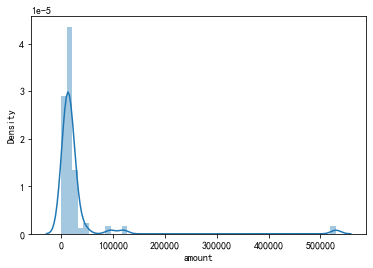

In [456]:
sns.distplot(sony['amount'])

<AxesSubplot:xlabel='age', ylabel='amount'>

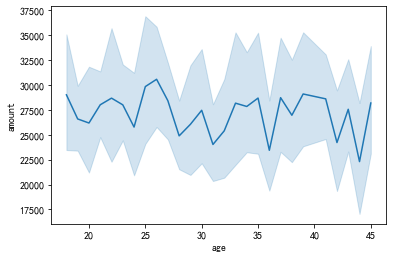

In [457]:
sns.lineplot(x='age',y='amount',data=sony)
# 不太明显

<AxesSubplot:ylabel='age'>

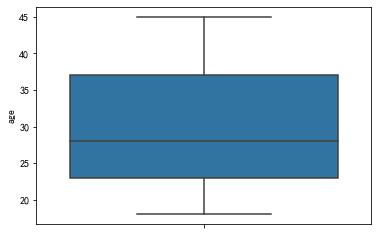

In [458]:
sns.boxplot(y='age', data=sony)

In [459]:
sony['gender'].value_counts(0)

1    13843
0     8533
Name: gender, dtype: int64

Text(0.5, 1.0, '用户的男女比例')

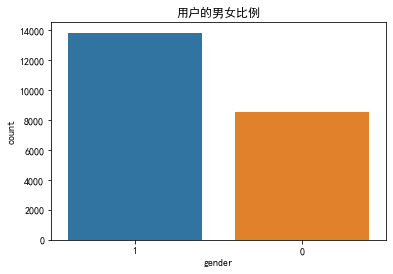

In [460]:
sns.countplot(x='gender',data=sony, order=sony['gender'].value_counts().sort_values(ascending=False).index)
plt.title('用户的男女比例')

<AxesSubplot:xlabel='gender', ylabel='amount'>

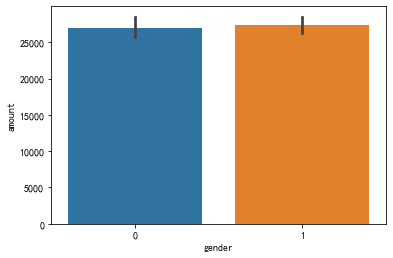

In [461]:
sns.barplot(x='gender',y='amount',data =sony)
# 虽然女性用户比男性多，但是女性用户贡献的销售额比男性少，可能男性在购买的产品单价上比较高
# 女性用户的购买潜力比较大

<AxesSubplot:xlabel='CHANNEL', ylabel='amount'>

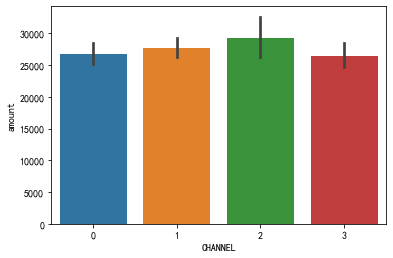

In [464]:
sns.barplot(x='CHANNEL',y='amount',data =sony)

## 构建模型

In [66]:
sony.corr()[['amount']].sort_values('amount',ascending=False)

,amount
amount,1.000000
Member_level,0.007660
registration_date,0.004295
city,0.003207
gender,0.002783
Member_value,0.001307
channel,-0.001316
Marriage,-0.001925
age,-0.004071
transaction_date,-0.004647


<AxesSubplot:>

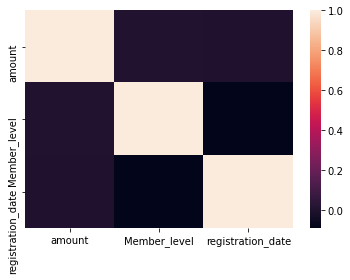

In [67]:
#热力图
q=['amount','Member_level','registration_date']
sns.heatmap(sony[q].corr())

从上可以看出，所选变量和因变量之间相关关系很弱，下面选择Member_level、registration_date、gender、Member_value、Have_child作为自变量，建立多元线性回归模型
因变量为amount

In [68]:
model=LinearRegression()
y = sony['amount']
x = sony[['Member_level','registration_date','gender','Member_value','Have_child']]
model.fit(x,y) #模型拟合
# 查看拟合系数估计值
model.coef_

array([ 4.29639174e+02,  7.87174849e-01,  3.18144296e+02, -1.61025440e+00,
       -8.45124881e+02])

In [69]:
# 查看截距项，获取标准线性回归结果
# 模型评分
score = model.score(x,y) 
score

0.00012554417452903532

In [70]:
# 计算y的预测值
dictons = model.predict(x)
dictons

array([28060.6622331 , 28060.6622331 , 28987.65602707, ...,
       26434.35303801, 26904.43897056, 27463.09699466])

In [71]:
error = dictons - y

In [72]:
# 计算均方误差
rme = (error**2).mean()**0.5

In [73]:
# 计算平均绝对误差
mae = abs(error).mean()

In [74]:
print(rme)
print(mae)

70505.92979390868
24953.49088020358


In [75]:
from statsmodels.formula.api import ols
model_ols=ols('y~x',sony).fit()
print(model_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5618
Date:                Mon, 22 Mar 2021   Prob (F-statistic):              0.729
Time:                        18:27:16   Log-Likelihood:            -2.8154e+05
No. Observations:               22376   AIC:                         5.631e+05
Df Residuals:                   22370   BIC:                         5.631e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.644e+04   1644.985     16.074      0.0

结果：amount=2.644e+04+429.6392*ember_level+0.7872*registration_date+318.1443*gender-1.6103*Member_value-845.1249*Have_child

三、营销建议

1、男性用户在索尼发生购买行为的可能性更高；这可能是男性用户对数码电子产品类的需求比女性高。对应的索尼可能着重于男性新用户的挖掘和老用户的留存；

2、女性用户对销售额的贡献度不如男性，应该着力挖掘女性用户的购买潜力。

3、有小孩的家庭相较于其他家庭，在索尼的购买金额会降低，有可能是家庭的负担变重，用户的消费能力有所下降，索尼可能对有小孩的家庭提出刺激消费的营销活动；

4、老用户是索尼消费军的主力，索尼应该做好老用户的留存，对会员等级高的用户提供积分兑换等奖励机制。